*__Principal Component Analysis(PCA)__*

In [1]:
%matplotlib inline

In [2]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

In [3]:
from common import *
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

In [4]:
np.random.seed(0)

In [5]:
import warnings; warnings.simplefilter('ignore')

In [6]:
# Dataset Phone Price
x_train, x_test, y_train, y_test = read_dataset(path_to_file="../Data/dataset2/train.csv")

In [7]:
y_test[y_test<=1] = 0
y_test[y_test>=2] = 1
y_train[y_train<=1] = 0
y_train[y_train>=2] = 1


In [8]:
# preventing information about the distribution of the test set leaking into your model
standard_scaler = StandardScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)
x_test_scaled = standard_scaler.fit_transform(x_test)
y_train_scaled = standard_scaler.fit_transform(y_train).astype('int')
y_test_scaled = standard_scaler.fit_transform(y_test).astype('int')

In [9]:
for i in range(2, 20):
    pca = PCA(n_components=i, random_state=0)
    pca.fit_transform(x_train.values)
    x_new = pca.fit_transform(x_train.values)
#     rc_err = mean_squared_error(x_train.values, np.dot(x_new, np.linalg.pinv(pca.components_.T)))
    print(f"Dimension={i}, Sum: {sum(pca.explained_variance_ratio_)}")

Dimension=2, Sum: 0.8310959629212444
Dimension=3, Sum: 0.9427532506924291
Dimension=4, Sum: 0.9990407046788937
Dimension=5, Sum: 0.9997393343192365
Dimension=6, Sum: 0.9999261258195924
Dimension=7, Sum: 0.999953129007327
Dimension=8, Sum: 0.9999700353044472
Dimension=9, Sum: 0.9999857471493718
Dimension=10, Sum: 0.9999909694790575
Dimension=11, Sum: 0.9999957744702452
Dimension=12, Sum: 0.9999987505905236
Dimension=13, Sum: 0.9999991359260899
Dimension=14, Sum: 0.9999993341774311
Dimension=15, Sum: 0.9999994857604236
Dimension=16, Sum: 0.9999996323655169
Dimension=17, Sum: 0.9999997713664832
Dimension=18, Sum: 0.9999999024769418
Dimension=19, Sum: 0.9999999525290876


In [29]:
# After chosing the best component
best_component = 10
pca = PCA(n_components=best_component, random_state=0)
xn = pca.fit_transform(x_train)
for i in range(1, best_component):
    x_train[f"pca-{i}"] = xn[:, i]

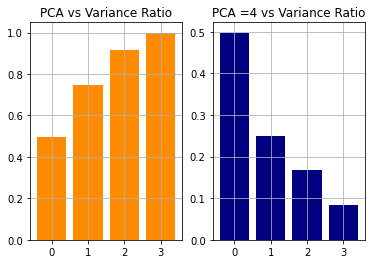

In [11]:
sums_pca = []
for i in range(1, 5):
    pca = PCA(n_components=i, random_state=0)
    pca.fit_transform(x_train)
    sums_pca.append(sum(pca.explained_variance_ratio_))

pca2 = PCA(n_components=4, random_state=0)
pca2.fit_transform(x_train)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title(f"PCA vs Variance Ratio")
ax1.bar(range(len(sums_pca)), sums_pca, color="darkorange")
plt.xticks(range(len(sums_pca)))
ax1.grid()

ax2.set_title(f"PCA =4 vs Variance Ratio")
ax2.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, color='navy')
ax2.grid()

In [20]:
np.array(y_train['price_range']).reshape(-1, 1)

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [25]:
# Iterate over components and see which one results in least KMeans error
pca_score = []
for i in range(1, 20):
    pca = PCA(n_components=i, random_state=0)
    xtr = pca.fit_transform(x_train)  
    kmm = KMeans(n_clusters=2, max_iter=100, random_state=0, n_jobs=-1).fit(xtr)
    pca_score.append(accuracy_score(kmm.labels_, y_train))
# Same - even here the minimum number of components  = 4 

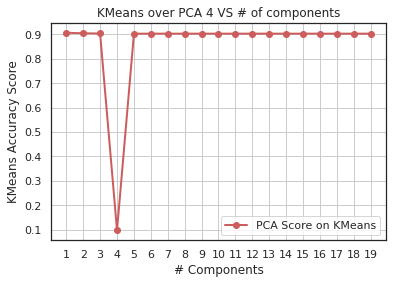

In [26]:
plt.figure()
plt.title("KMeans over PCA 4 VS # of components")
plt.plot(range(1, 20), pca_score, 'o-', lw=2, color='indianred', label="PCA Score on KMeans")
plt.xlabel("# Components")
plt.ylabel("KMeans Accuracy Score")
plt.legend()
plt.xticks(range(1, 20))
plt.grid()

<AxesSubplot:xlabel='pca-1', ylabel='pca-2'>

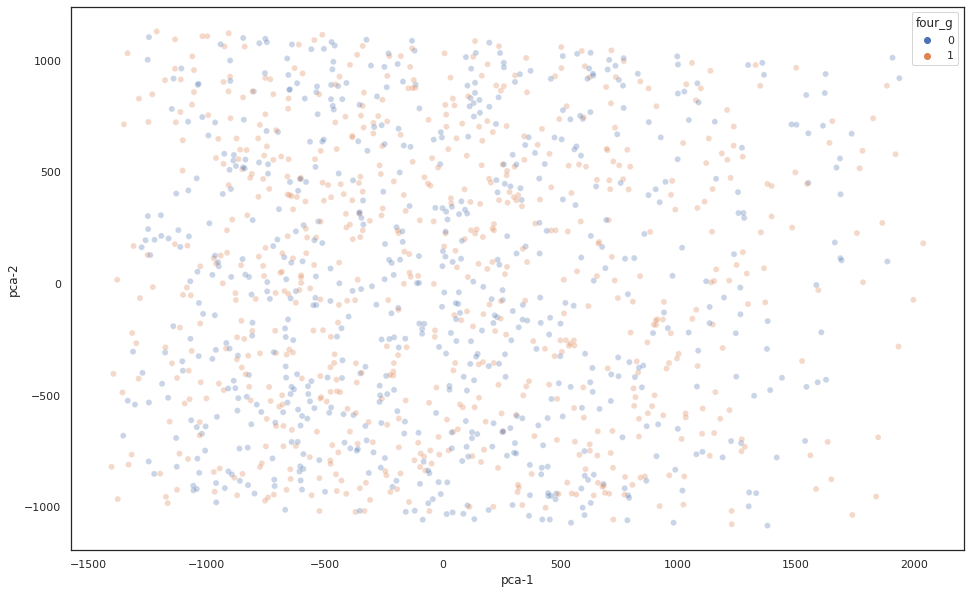

In [32]:
plt.figure(figsize=(16,10))
sns.set_theme(style="white")
sns.scatterplot(
    x="pca-1", y="pca-2",
    hue="four_g",
    data=x_train,
    legend="full",
    alpha=0.3
)

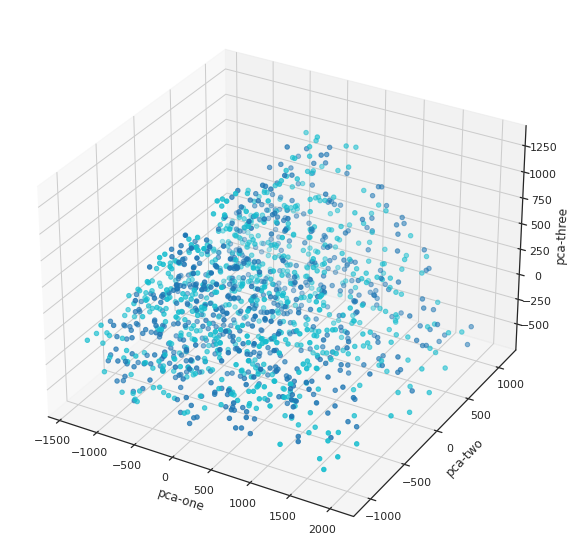

In [33]:
rndperm = np.random.permutation(x_train.shape[0])
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=x_train["pca-1"], 
    ys=x_train["pca-2"], 
    zs=x_train["pca-3"], 
    c=x_train["four_g"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [ ]:
s = {}
h = {}
pca_4 = PCA(n_components=4, random_state=0)
pca_4.fit_transform(ufcX_df.values)
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, n_init=50, max_iter=1000, random_state=0, n_jobs=-1).fit(xn)
    label = kmeans.labels_
    s[i] = silhouette_score(x_train['pca-1'], label, metric='euclidean')
    h[i] = homogeneity_score(y_train.values, label)


In [ ]:
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
x_train['pca-1'].values